In [1]:
import re
%matplotlib inline
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier


from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import FunctionTransformer

In [2]:

'''
df5=pd.read_csv('scraped_data/crawling_5.csv')
df6=pd.read_csv('scraped_data/crawling_6.csv')
df7=pd.read_csv('scraped_data/crawling_7.csv')
df8=pd.read_csv('scraped_data/crawling_8.csv')
df9=pd.read_csv('scraped_data/crawling_9.csv')
df10=pd.read_csv('scraped_data/crawling_10.csv')
df11=pd.read_csv('scraped_data/crawling_11.csv')
data_df=pd.concat([df0,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11])
'''

df0=pd.read_csv('scraped_data/crawling_0.csv')
df1=pd.read_csv('scraped_data/crawling_1.csv')
df2=pd.read_csv('scraped_data/crawling_2.csv')
df3=pd.read_csv('scraped_data/crawling_3.csv')
df4=pd.read_csv('scraped_data/crawling_4.csv')
data_df=pd.concat([df0,df1,df2,df3,df4])


In [3]:
data_df.reset_index(drop=True, inplace=True)

In [4]:
selected_categories = data_df['class'].value_counts()[:10].index.tolist()
selected_categories

['thời sự',
 'thế giới',
 'pháp luật',
 'thể thao',
 'kinh doanh',
 'sức khỏe',
 'cần biết',
 'giáo dục',
 'văn hóa',
 'nhịp sống trẻ']

In [5]:
data_df = data_df[data_df['class'].isin(selected_categories)]
data_df

,links,title,description,content,class
0,https://tuoitre.vn/tong-thong-trump-xac-nhan-k...,tổng thống trump xác nhận không dự lễ nhậm chứ...,tto - tổng thống mỹ donald trump đăng tweet ch...,sau khi đưa ra cam kết sẽ đảm bảo chuyển giao ...,thế giới
1,https://tuoitre.vn/dat-nuoc-dat-niem-tin-vao-n...,đất nước đặt niềm tin vào những học sinh xuất sắc,"tt0 - tối 8-1, thủ tướng chính phủ nguyễn xuân...","chia sẻ tại buôi lễ, thủ tướng nguyễn xuân phú...",giáo dục
2,https://tuoitre.vn/luat-su-my-phan-bien-ong-tr...,luật sư mỹ phản biện: ông trump đâu có kêu ngư...,tto - trên chương trình bill hemmer reports củ...,"ngày 6-1, tình trạng bạo lực đã xảy ra tại tòa...",thế giới
3,https://tuoitre.vn/thanh-pho-phu-quoc-se-phat-...,thành phố phú quốc sẽ phát triển dựa trên 4 tr...,"tto - tối 8-1 tại phường an thới, chính quyền ...",phát biểu tại buôi lễ công bố thành lập tp phú...,thời sự
4,https://tuoitre.vn/ong-trump-nguoi-ung-ho-toi-...,ông trump: người ủng hộ tôi 'sẽ có tiếng nói t...,tto - trong nội dung đăng trên twitter sau gần...,"""75 triệu người mỹ yêu nước vĩ đại đã bầu cho ...",thế giới
...,...,...,...,...,...
23464,/vi-sao-gia-vang-the-gioi-tang-manh-va-se-con-...,vì sao giá vàng thế giới tăng mạnh và sẽ còn t...,tto - giá vàng thế giới đã tăng vượt mốc 2.000...,"tại mỹ, giá vàng ngày 6-8 (giờ địa phương) tiế...",kinh doanh
23466,/thuong-hieu-tri-gia-hon-2-4-ti-usd-vinamilk-d...,"thương hiệu trị giá hơn 2,4 tỉ usd, vinamilk d...","tto - được forbes việt nam ""định giá"" hơn 2,4 ...",sau năm năm kể từ lần đầu tiên forbes việt nam...,kinh doanh
23467,/malaysia-cho-ban-hang-gia-re-phuc-hoi-kinh-te...,malaysia cho 'bán hàng giá rẻ' phục hồi kinh t...,malaysia cho phép các thương nhân được tự do t...,chính phủ malaysia vừa cho phép các thương nhâ...,cần biết
23468,/thai-lan-len-ke-hoach-thu-hut-nguoi-nuoc-ngoa...,thái lan lên kế hoạch thu hút người nước ngoai...,bộ du lịch và thể thao thái lan sẽ thảo luận v...,bộ du lịch và thể thao thái lan đang lên kế ho...,cần biết


In [6]:
data_df=data_df[~((data_df['title'].isnull())|
                  (data_df['description'].isnull())|
                  (data_df['content'].isnull()))]

In [7]:
data_df.drop(['links'],axis=1,inplace=True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
data_df.drop_duplicates(inplace=True)

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
data_df

,title,description,content,class
0,tổng thống trump xác nhận không dự lễ nhậm chứ...,tto - tổng thống mỹ donald trump đăng tweet ch...,sau khi đưa ra cam kết sẽ đảm bảo chuyển giao ...,thế giới
1,đất nước đặt niềm tin vào những học sinh xuất sắc,"tt0 - tối 8-1, thủ tướng chính phủ nguyễn xuân...","chia sẻ tại buôi lễ, thủ tướng nguyễn xuân phú...",giáo dục
2,luật sư mỹ phản biện: ông trump đâu có kêu ngư...,tto - trên chương trình bill hemmer reports củ...,"ngày 6-1, tình trạng bạo lực đã xảy ra tại tòa...",thế giới
3,thành phố phú quốc sẽ phát triển dựa trên 4 tr...,"tto - tối 8-1 tại phường an thới, chính quyền ...",phát biểu tại buôi lễ công bố thành lập tp phú...,thời sự
4,ông trump: người ủng hộ tôi 'sẽ có tiếng nói t...,tto - trong nội dung đăng trên twitter sau gần...,"""75 triệu người mỹ yêu nước vĩ đại đã bầu cho ...",thế giới
...,...,...,...,...
23464,vì sao giá vàng thế giới tăng mạnh và sẽ còn t...,tto - giá vàng thế giới đã tăng vượt mốc 2.000...,"tại mỹ, giá vàng ngày 6-8 (giờ địa phương) tiế...",kinh doanh
23466,"thương hiệu trị giá hơn 2,4 tỉ usd, vinamilk d...","tto - được forbes việt nam ""định giá"" hơn 2,4 ...",sau năm năm kể từ lần đầu tiên forbes việt nam...,kinh doanh
23467,malaysia cho 'bán hàng giá rẻ' phục hồi kinh t...,malaysia cho phép các thương nhân được tự do t...,chính phủ malaysia vừa cho phép các thương nhâ...,cần biết
23468,thái lan lên kế hoạch thu hút người nước ngoai...,bộ du lịch và thể thao thái lan sẽ thảo luận v...,bộ du lịch và thể thao thái lan đang lên kế ho...,cần biết


In [10]:
from pyvi import ViTokenizer, ViPosTagger # thư viện NLP tiếng Việt
from tqdm import tqdm
import numpy as np
import gensim # thư viện NLP

In [11]:
data_df["content"][0]

'sau khi đưa ra cam kết sẽ đảm bảo chuyển giao quyền lực một cách hòa bình, êm thắm, ngày 8-1, ông trump viết trên twitter: "trả lời câu hỏi của các bạn, tôi sẽ không tham dự lễ nhậm chức ngày 20-1".dòng tweet này của ông liên tục biến động các con số về lượt người xem và chia sẻ cũng như bình luận. nhiều người phản đối đã để lại bình luận không mấy thân thiện bên dưới như "không ai muốn ngài có mặt ở đó"...theo hãng tin reuters, một nguồn tin am hiểu nội vụ cho biết ở nhà trắng đã có sự bàn bạc về việc ông trump sẽ rời washington ngày 19-1. cũng theo nguồn tin này, ông trump sẽ đến khu nghỉ dưỡng của mình ở bang florida.trong lịch sử mỹ, có nhiều tổng thống từng quyết định không dự lễ nhậm chức của người kế nhiệm. tổng thống richard nixon rời nhà trắng khi gerald ford tuyên thệ. ông nixon từ chức, báo với phó tổng thống của mình là gerald ford vào ngày 8-8 và ông ford thay mình từ "ngày hôm nay". lúc 9h30 ngày 9-8, ông nixon có bài phát biểu cuôi cùng sau đó rời đi. khi ông đáp máy ba

In [12]:
#' '.join(gensim.utils.simple_preprocess(data_df['content'][0]))
def gensim_utils_simple_preprocess(x):
    return ' '.join(gensim.utils.simple_preprocess(x))
data_df['content']=data_df['content'].apply(gensim_utils_simple_preprocess)
data_df['class']=data_df['class'].apply(gensim_utils_simple_preprocess)

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [13]:
def chuan_hoa_dau_tu_tieng_viet(word):
    if not is_valid_vietnam_word(word):
        return word
 
    chars = list(word)
    dau_cau = 0
    nguyen_am_index = []
    qu_or_gi = False
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1:
            continue
        elif x == 9:  # check qu
            if index != 0 and chars[index - 1] == 'q':
                chars[index] = 'u'
                qu_or_gi = True
        elif x == 5:  # check gi
            if index != 0 and chars[index - 1] == 'g':
                chars[index] = 'i'
                qu_or_gi = True
        if y != 0:
            dau_cau = y
            chars[index] = bang_nguyen_am[x][0]
        if not qu_or_gi or index != 1:
            nguyen_am_index.append(index)
    if len(nguyen_am_index) < 2:
        if qu_or_gi:
            if len(chars) == 2:
                x, y = nguyen_am_to_ids.get(chars[1])
                chars[1] = bang_nguyen_am[x][dau_cau]
            else:
                x, y = nguyen_am_to_ids.get(chars[2], (-1, -1))
                if x != -1:
                    chars[2] = bang_nguyen_am[x][dau_cau]
                else:
                    chars[1] = bang_nguyen_am[5][dau_cau] if chars[1] == 'i' else bang_nguyen_am[9][dau_cau]
            return ''.join(chars)
        return word
 
    for index in nguyen_am_index:
        x, y = nguyen_am_to_ids[chars[index]]
        if x == 4 or x == 8:  # ê, ơ
            chars[index] = bang_nguyen_am[x][dau_cau]
            # for index2 in nguyen_am_index:
            #     if index2 != index:
            #         x, y = nguyen_am_to_ids[chars[index]]
            #         chars[index2] = bang_nguyen_am[x][0]
            return ''.join(chars)
 
    if len(nguyen_am_index) == 2:
        if nguyen_am_index[-1] == len(chars) - 1:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            chars[nguyen_am_index[0]] = bang_nguyen_am[x][dau_cau]
            # x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            # chars[nguyen_am_index[1]] = bang_nguyen_am[x][0]
        else:
            # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    else:
        # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
        # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
        x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
        chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
        # x, y = nguyen_am_to_ids[chars[nguyen_am_index[2]]]
        # chars[nguyen_am_index[2]] = bang_nguyen_am[x][0]
    return ''.join(chars)

def is_valid_vietnam_word(word):
    chars = list(word)
    nguyen_am_index = -1
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x != -1:
            if nguyen_am_index == -1:
                nguyen_am_index = index
            else:
                if index - nguyen_am_index != 1:
                    return False
                nguyen_am_index = index
    return True

def chuan_hoa_dau_cau_tieng_viet(sentence):
    """
        Chuyển câu tiếng việt về chuẩn gõ dấu kiểu cũ.
        :param sentence:
        :return:
        """
    sentence = sentence.lower()
    words = sentence.split()
    for index, word in enumerate(words):
        cw = re.sub(r'(^\\p{P}*)([p{L}.]*\\p{L}+)(\\p{P}*$)', r'\\1/\\2/\\3', word).split('/')
        # print(cw)
        if len(cw) == 3:
            cw[1] = chuan_hoa_dau_tu_tieng_viet(cw[1])
        words[index] = ''.join(cw)
    return ' '.join(words)



data_df['content']=data_df['content'].apply(chuan_hoa_dau_cau_tieng_viet)
data_df['class']=data_df['class'].apply(chuan_hoa_dau_cau_tieng_viet)

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
dicchar = loaddicchar()
 
# Đưa toàn bộ dữ liệu qua hàm này để chuẩn hóa lại
def covert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

data_df['content']=data_df['content'].apply(covert_unicode)
data_df['class']=data_df['class'].apply(covert_unicode)

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [15]:
def lower_character(a):
    return a.lower()
data_df['content']=data_df['content'].apply(lower_character)
#xoá ký tự thừa
def remove_unnecessary(paragraph):
    temp=re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',paragraph)
    return re.sub(r'\s+', ' ', temp).strip()

data_df['content']=data_df['content'].apply(remove_unnecessary)


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


# Tokenize


In [16]:
data_df['content']=data_df['content'].apply(ViTokenizer.tokenize)

C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Sau khi tìm hiểu xong ta bắt đầu chia tập dữ liệu và bắt đầu tiền xử lí

In [17]:
y_sr = data_df["class"] # sr là viết tắt của series
X_df = data_df["content"]
train_X_df, val_X_df, train_y_sr, val_y_sr = train_test_split(X_df, y_sr, test_size=0.3,stratify=y_sr, random_state=0)

# Loại bỏ stopwords


In [18]:
import io
f = io.open("vietnamese-stopwords-dash.txt", mode="r", encoding="utf-8")
stopwords=f.read()
f.close()
stopwords=stopwords.split('\n')
stopwords

['a_lô',
 'a_ha',
 'ai',
 'ai_ai',
 'ai_nấy',
 'ai_đó',
 'alô',
 'amen',
 'anh',
 'anh_ấy',
 'ba',
 'ba_ba',
 'ba_bản',
 'ba_cùng',
 'ba_họ',
 'ba_ngày',
 'ba_ngôi',
 'ba_tăng',
 'bao_giờ',
 'bao_lâu',
 'bao_nhiêu',
 'bao_nả',
 'bay_biến',
 'biết',
 'biết_bao',
 'biết_bao_nhiêu',
 'biết_chắc',
 'biết_chừng_nào',
 'biết_mình',
 'biết_mấy',
 'biết_thế',
 'biết_trước',
 'biết_việc',
 'biết_đâu',
 'biết_đâu_chừng',
 'biết_đâu_đấy',
 'biết_được',
 'buổi',
 'buổi_làm',
 'buổi_mới',
 'buổi_ngày',
 'buổi_sớm',
 'bà',
 'bà_ấy',
 'bài',
 'bài_bác',
 'bài_bỏ',
 'bài_cái',
 'bác',
 'bán',
 'bán_cấp',
 'bán_dạ',
 'bán_thế',
 'bây_bẩy',
 'bây_chừ',
 'bây_giờ',
 'bây_nhiêu',
 'bèn',
 'béng',
 'bên',
 'bên_bị',
 'bên_có',
 'bên_cạnh',
 'bông',
 'bước',
 'bước_khỏi',
 'bước_tới',
 'bước_đi',
 'bạn',
 'bản',
 'bản_bộ',
 'bản_riêng',
 'bản_thân',
 'bản_ý',
 'bất_chợt',
 'bất_cứ',
 'bất_giác',
 'bất_kì',
 'bất_kể',
 'bất_kỳ',
 'bất_luận',
 'bất_ngờ',
 'bất_nhược',
 'bất_quá',
 'bất_quá_chỉ',
 'bất_thình_l

In [19]:
def remove_stopwords(line):
    words = []
    for word in line.strip().split():
        if word not in stopwords:
            words.append(word)
    return ' '.join(words)


In [20]:
train_X_df=train_X_df.apply(remove_stopwords)
val_X_df=val_X_df.apply(remove_stopwords)

# Feature Engineering đưa dữ liệu dạng văn bản đã được xử lý về dạng vector thuộc tính có dạng số học bằng TF-IDF Vectors ở mức Word level 

`TF-IDF`(`term frequency–inverse document frequency`) là một cách biểu diễn văn bản theo dạng `Terms frequency` nhưng giá trị của 1 từ tăng theo giá trị của từ đó trong văn bản nhưng giảm đi khi tần số của từ đó trong bộ sưu tập văn bản `corpus` càng cao

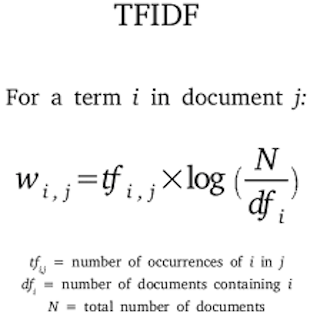

In [47]:
# word level - we choose max number of words equal to 30000 except all words (100k+ words)
tfidf_vect = TfidfVectorizer(analyzer='word', max_features=30000)
tfidf_vect.fit(train_X_df) # learn vocabulary and idf from training set
train_X_tfidf =  tfidf_vect.transform(train_X_df)
# assume that we don't have test set before
val_X_tfidf =  tfidf_vect.transform(val_X_df)
train_X_tfidf.shape

(11209, 30000)

In [23]:
dic_vocabulary = tfidf_vect.vocabulary_

Text(0.5, 1, 'Sparse Matrix Sample')

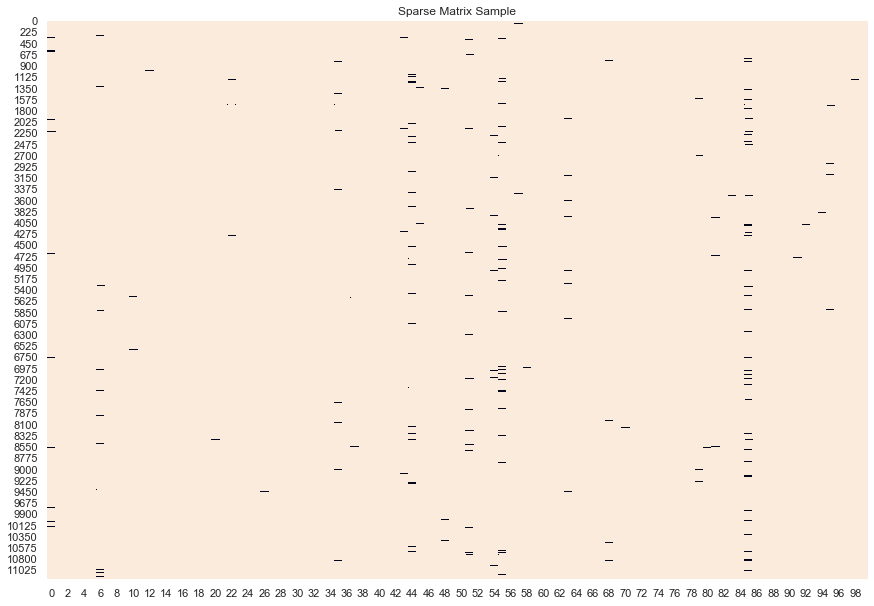

In [30]:
import seaborn as sns
sns.set(rc={'figure.figsize':(14.7,10.27)})
sns.heatmap(train_X_tfidf.todense()[:,np.random.randint(0,train_X_tfidf.shape[1],100)]==0, vmin=0, vmax=1, cbar=False).set_title('Sparse Matrix Sample')

### Sử dụng chi-squares để rút trích đặc trưng quan trọng 

In [37]:


from sklearn import feature_selection
y = train_y_sr
X_names = tfidf_vect.get_feature_names()
p_value_limit = 0.95
dtf_features = pd.DataFrame()
for cat in np.unique(y):
    chi2, p = feature_selection.chi2(train_X_tfidf, y==cat)
    dtf_features = dtf_features.append(pd.DataFrame(
                   {"feature":X_names, "score":1-p, "y":cat}))
    dtf_features = dtf_features.sort_values(["y","score"], 
                    ascending=[True,False])
    dtf_features = dtf_features[dtf_features["score"]>p_value_limit]
X_names = dtf_features["feature"].unique().tolist()

## Chuyển sang tf-idf mới

In [46]:
vectorizer = TfidfVectorizer(vocabulary=X_names)
vectorizer.fit(train_X_df)
train_X_tfidf = vectorizer.transform(train_X_df)
val_X_tfidf = vectorizer.transform(val_X_df)
train_X_tfidf.shape

(11209, 7054)

In [48]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=300, random_state=42)
svd.fit(train_X_tfidf)


train_X_tfidf_svd = svd.transform(train_X_tfidf)
val_X_tfidf_svd = svd.transform(val_X_tfidf)

In [41]:
train_X_tfidf_svd

array([[ 0.20831728,  0.20815995, -0.14190173, ...,  0.01874909,
        -0.01620289,  0.01606174],
       [ 0.12526457, -0.06229155, -0.01682114, ...,  0.00386717,
        -0.02049508,  0.00536609],
       [ 0.20329617, -0.09658506, -0.08669772, ...,  0.01357439,
         0.01254755, -0.0105242 ],
       ...,
       [ 0.13247145,  0.10778455, -0.09273103, ...,  0.00206947,
         0.00747016, -0.00779783],
       [ 0.12157296, -0.00294504, -0.05474325, ..., -0.04841147,
        -0.01149821, -0.03563658],
       [ 0.20760482, -0.00475661,  0.07543839, ...,  0.0051618 ,
        -0.00115708,  0.01353893]])

# Xây dựng mô hình

In [42]:
encoder =LabelEncoder()
train_y_sr_n = encoder.fit_transform(train_y_sr)
val_y_sr_n = encoder.fit_transform(val_y_sr)

# Logistic Regression

# với dữ liệu qua chi-squares

In [49]:
from sklearn.linear_model import LogisticRegression
log_reg_model=LogisticRegression()
log_reg_model.fit(train_X_tfidf_svd,train_y_sr_n)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
log_reg_model.score(train_X_tfidf_svd,train_y_sr_n)

0.8335266303862967

In [51]:
prediction=log_reg_model.predict(val_X_tfidf_svd)
1 - (prediction != val_y_sr_n).mean()

0.8116545265348596

# với dữ liệu chưa chi-squares


In [72]:
from sklearn.linear_model import LogisticRegression
log_reg_model=LogisticRegression()
log_reg_model.fit(train_X_tfidf_svd,train_y_sr_n)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Độ chính xác tập training

In [73]:
log_reg_model.score(train_X_tfidf_svd,train_y_sr_n)

0.8335266303862967

### Độ chính xác tập valuation

In [74]:
prediction=log_reg_model.predict(val_X_tfidf_svd)

In [77]:
1 - (prediction != val_y_sr_n).mean()

0.8116545265348596

# Support Vector Machine (SVM)

In [80]:
from sklearn.svm import SVC
svm_classifier=SVC()
svm_classifier.fit(train_X_tfidf_svd,train_y_sr_n)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Độ chính xác tập training

In [81]:
svm_classifier.score(train_X_tfidf_svd,train_y_sr_n)

0.27085377821393525

### Độ chính xác tập valuation

In [82]:
prediction=svm_classifier.predict(val_X_tfidf_svd)
1 - (prediction != val_y_sr_n).mean()

0.2663891779396462

# MLPClassifier

In [84]:
mlp_classifier=MLPClassifier(hidden_layer_sizes=(20), activation='tanh',
                                 solver='lbfgs', random_state=0, max_iter=2500)
mlp_classifier.fit(train_X_tfidf_svd,train_y_sr_n)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=20, learning_rate='constant',
              learning_rate_init=0.001, max_iter=2500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

### Độ chính xác tập training

In [85]:
mlp_classifier.score(train_X_tfidf_svd,train_y_sr_n)

1.0

### Độ chính xác tập valuation

In [86]:
prediction=mlp_classifier.predict(val_X_tfidf_svd)
1 - (prediction != val_y_sr_n).mean()

0.7835587929240375